In [1]:
import numpy as np 
import pandas as pd
from collections import OrderedDict
import gmplot
from IPython.display import IFrame


In [2]:
data=pd.read_excel('global_terrorism_database.xlsx')
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Part 1

In [10]:
decade_data=data[data['region_txt']=='North America'].copy()
# print data['iyear']//10
decade_data['iyear']=decade_data['iyear']//10
# print decade_data['iyear']
decade_list=decade_data['iyear'].unique()
print decade_list
dict_decade_count={}
for i in decade_list:
    dict_decade_count[i]=len(decade_data[decade_data['iyear']==i])
print dict_decade_count

[197 198 199 200 201]
{200: 270, 201: 378, 197: 1596, 198: 558, 199: 654}


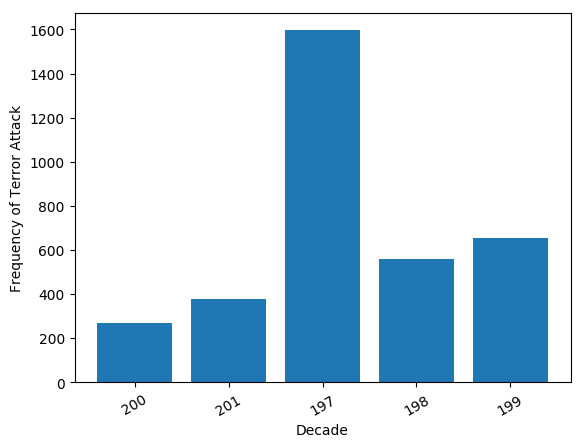

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
# import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(dict_decade_count.keys()))
 
plt.bar(y_pos, dict_decade_count.values())
plt.xticks(y_pos, dict_decade_count.keys(),fontsize=10,rotation=30)
plt.ylabel('Frequency of Terror Attack')
plt.xlabel('Decade')
# plt.figure(figsize=(1000,1000))
plt.show()

# Part 2

In [8]:
year_data =data[data['iyear']>=1970 ]#and data['iyear']<=2017]
# print len(year_data)
year_data=year_data[year_data['iyear']<=2017]
# print len(year_data)
years=year_data['iyear'].unique()
dict_years={}
max_year=1970
for i in years:
    dict_years[i]=len(year_data[year_data['iyear']==i])
    if dict_years[i]>dict_years[max_year]:
        max_year=i
print dict_years
# print max_year

{1970: 651, 1971: 471, 1972: 568, 1973: 473, 1974: 581, 1975: 740, 1976: 923, 1977: 1319, 1978: 1526, 1979: 2662, 1980: 2662, 1981: 2586, 1982: 2544, 1983: 2870, 1984: 3495, 1985: 2915, 1986: 2860, 1987: 3183, 1988: 3721, 1989: 4324, 1990: 3887, 1991: 4683, 1992: 5071, 1994: 3456, 1995: 3081, 1996: 3058, 1997: 3197, 1998: 934, 1999: 1395, 2000: 1814, 2001: 1906, 2002: 1333, 2003: 1278, 2004: 1166, 2005: 2017, 2006: 2758, 2007: 3242, 2008: 4805, 2009: 4721, 2010: 4826, 2011: 5076, 2012: 8522, 2013: 12036, 2014: 16903, 2015: 14965, 2016: 13587, 2017: 10900}


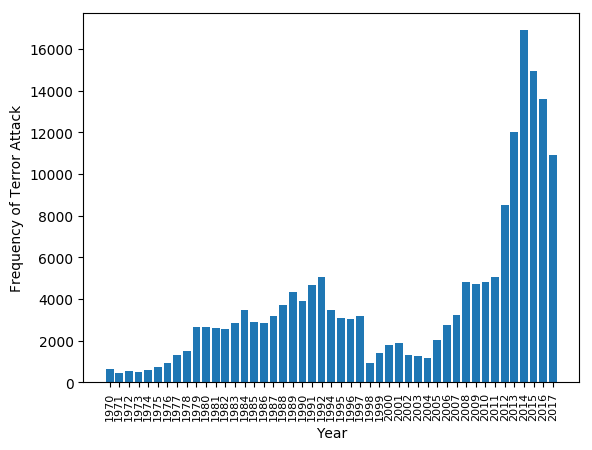

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
# import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(dict_years.keys()))
 
plt.bar(y_pos, dict_years.values())
plt.xticks(y_pos, dict_years.keys(),fontsize=8,rotation=90)
plt.ylabel('Frequency of Terror Attack')
plt.xlabel('Year')
# plt.figure(figsize=(1000,1000))
plt.show()

In [7]:
print "Max terror attack took place in year "+str(max_year)


Max terror attack took place in year 2014


In [11]:
year_continent_data=year_data[data['iyear']==max_year]
countries=year_continent_data['region_txt'].unique()
# print countries
dict_countinents={}
for c in countries:
    dict_countinents[c]=len(year_continent_data[year_continent_data['region_txt']==c])
# print dict_countinents

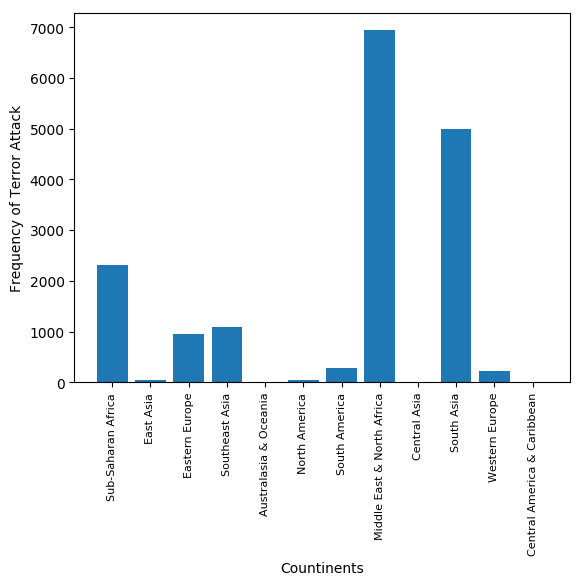

In [12]:
y_pos = np.arange(len(dict_countinents.keys())) 
plt.bar(y_pos, dict_countinents.values())
plt.xticks(y_pos, dict_countinents.keys(),fontsize=8,rotation=90)
plt.ylabel('Frequency of Terror Attack')
plt.xlabel('Countinents')
# plt.figure(figsize=(1000,1000))
plt.show()

# Part 3

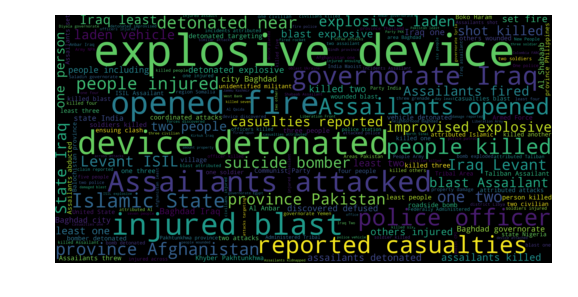

<Figure size 1000x2000 with 0 Axes>

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
text=''
text=data['summary'].str.cat(sep=' ')
stopwords = set(STOPWORDS)
stopwords.update(["nan","unknown","Unknown","Unknown Unknown","group","specific","motive","attack","responsibility","claimed","sources","incident","carried","trend","larger","incident","part","security","may","violence","related"])
wordcloud = WordCloud(stopwords=stopwords, height=3000, width=6000).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(10,20))
plt.show()


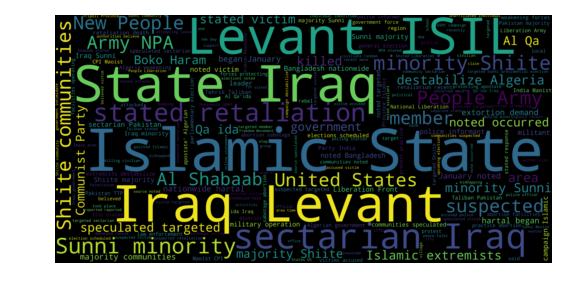

<Figure size 5000x10000 with 0 Axes>

In [38]:
text=''
text=data['motive'].str.cat(sep=' ')
# stopwords = set(STOPWORDS)
# stopwords.update(["nan","unknown","Unknown","Unknown Unknown","group","specific","motive","attack","responsibility","claimed","sources","incident","carried","trend","larger","incident","part","security","may","violence","related"])

wordcloud = WordCloud(stopwords=stopwords, height=3000, width=6000).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
# plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(50,100),facecolor='k')
plt.show()

# Part 4

In [38]:
import networkx as nx
import math
G=nx.Graph()
l=data.iloc[:,0].tolist()
G.add_nodes_from(l)
graph_data = data[data['related'].notnull()]
count=0
# print len(graph_data)
for index,row in graph_data.iterrows():
    r=[]
    try:
        r=row['related'].strip().split(',')
        if len(r)!=0:
            for i in r:
                try:
                    if int(i.strip())!=row['eventid']:
                        G.add_edge(row['eventid'],int(i.strip()))
                except:
                    i=i.replace('\\','')
                    i=i.replace(' and','')
                    l=i.split(' ')[1:]
                    for j in l:
                        try:
                            if int(j.strip())!=row['eventid']:
                                G.add_edge(row['eventid'],int(j.strip()))
                        except:
                            print l
    except:
        print row['related']
print G.number_of_edges(),G.number_of_nodes()

82797 181728


In [3]:
import pprint 
i=nx.connected_component_subgraphs(G)
print (len(i))
count=0
max_len=0
s=()
for j in i:
    if len(j)>1:
        count=count+1
    if len(j)>max_len:
        max_len=len(j)
        s=j
# print count
# print "Maximium Connected Compments for contains "+str(max_len)+" nodes and "+str(s.number_of_edges())+" edges."
# print s.number_of_edges()

NameError: name 'nx' is not defined

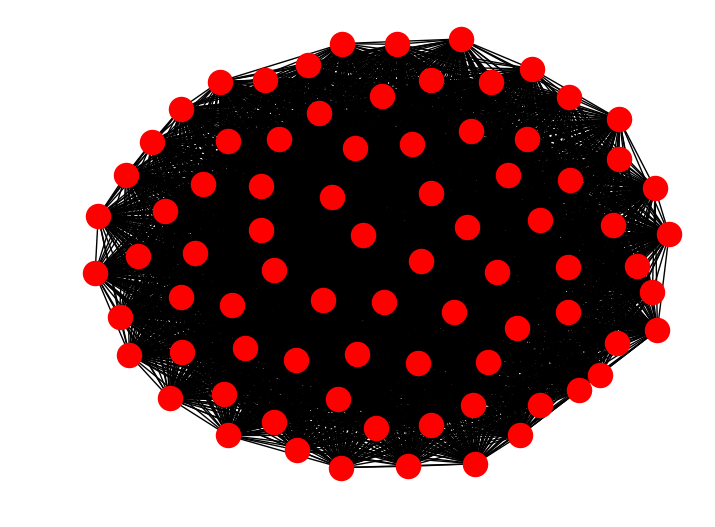

In [40]:
li=list(s)
nx.draw(s)
plt.show()
# plt.figure(figsize=(700,700))

#### Crossverification

In [44]:
edges_list=[]
for edges in G.edges:
    if edges[0] in li and edges[1] in li:
        edges_list.append(edges)
print "Number of edges "+str(len(edges_list))

Number of edges 3160


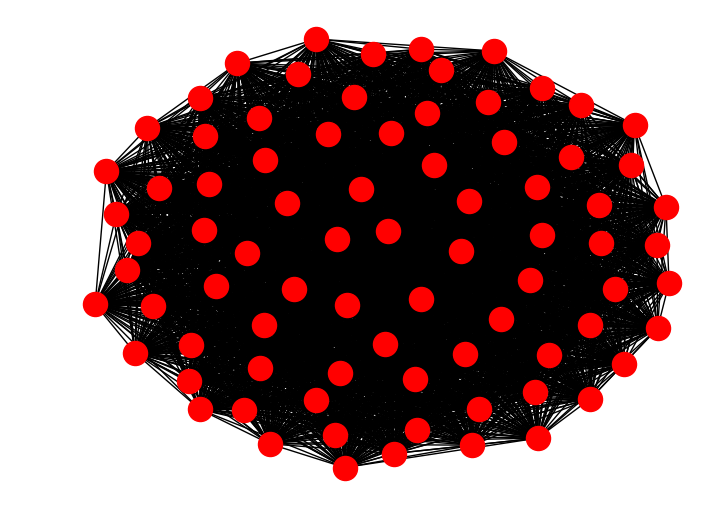

In [42]:
conneted_graph=nx.Graph()
conneted_graph.add_nodes_from(li)
conneted_graph.add_edges_from(edges_list)
nx.draw(conneted_graph)
plt.show()
